In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
# {"grid.color": ".6", "grid.linestyle": ":"}
sns.set(font_scale = 1.0)
sns.set_style(style = "white")

In [2]:
df = pd.read_csv('/data02/MyArchive/aisteer_3Dencoders/voids_paper_data/output_exp1.csv')

In [3]:
df['${1/r}$'] = 1.0/df['r_fac']
df['t_rec_gpu'] = df['t_filt'] + df['t_mask'] + df['t_backproj']
df['t_rec'] = df['t_cpu2gpu'] + df['t_rec_gpu'] + df['t_gpu2cpu']
df['speedup-rec-gpu'] = df['t_rec_gpu'].iloc[-1]/df['t_rec_gpu']
df['speedup-bp'] = df['t_backproj'].iloc[-1]/df['t_backproj']
df['speedup-rec-net'] = df['t_rec'].iloc[-1]/df['t_rec']

In [4]:
df

,r_fac,ntheta,nz,n,t_cpu2gpu,t_filt,t_mask,t_backproj,t_gpu2cpu,${1/r}$,t_rec_gpu,t_rec,speedup-rec-gpu,speedup-bp,speedup-rec-net
0,0.010000,1500.0,64.0,2048.0,80.286621,39.335522,14.497760,27.313536,8.558752,100.000000,81.146817,169.992190,33.296254,89.988918,19.004212
1,0.016681,1500.0,64.0,2048.0,79.888382,39.255711,14.665152,42.756287,7.835296,59.948425,96.677149,184.400827,27.947504,57.486646,17.519269
2,0.027826,1500.0,64.0,2048.0,80.415298,39.321537,14.960256,68.608833,12.711936,35.938137,122.890626,216.017860,21.986095,35.825059,14.955095
3,0.046416,1500.0,64.0,2048.0,80.407394,39.421024,15.591168,113.014145,21.635073,21.544347,168.026338,270.068805,16.080128,21.748742,11.962017
4,0.077426,1500.0,64.0,2048.0,80.601089,39.412865,17.950081,187.292511,35.979263,12.915497,244.655457,361.235809,11.043633,13.123405,8.943099
5,0.129155,1500.0,64.0,2048.0,80.120644,39.460865,28.576511,314.686249,89.399651,7.742637,382.723625,552.243919,7.059624,7.810686,5.849893
6,0.215443,1500.0,64.0,2048.0,80.380959,39.573952,45.807423,529.415710,98.564636,4.641589,614.797085,793.742680,4.394759,4.642695,4.070044
7,0.359381,1500.0,64.0,2048.0,80.984032,39.665630,74.653053,888.016907,248.564026,2.782559,1002.335590,1331.883648,2.695589,2.767870,2.425563
8,0.599484,1500.0,64.0,2048.0,80.102562,39.546879,123.305084,1486.480469,269.746765,1.668101,1649.332432,1999.181759,1.638169,1.653514,1.615945
9,1.000000,1500.0,64.0,2048.0,80.021889,39.696159,204.273346,2457.915527,448.660736,1.000000,2701.885033,3230.567657,1.000000,1.000000,1.000000


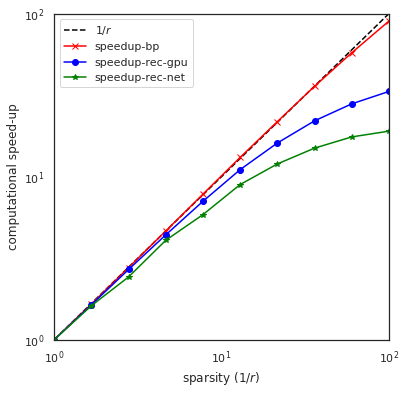

In [5]:
fig, ax = plt.subplots(1,1, figsize = (6,6))
labels = ['${1/r}$', 'speedup-bp', 'speedup-rec-gpu', 'speedup-rec-net']
colors = ['black', 'red', 'blue', 'green']
markers = ['--', 'x-', 'o-', '*-']

for iplot, label in enumerate(labels):
    ax.plot(df['${1/r}$'], df[label], markers[iplot], color = colors[iplot], label = label)
ax.set_xlabel("sparsity (${1/r}$)")
ax.set_ylabel("computational speed-up")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([1,100])
ax.set_ylim([1,100])
ax.legend()

In [6]:
df

,r_fac,ntheta,nz,n,t_cpu2gpu,t_filt,t_mask,t_backproj,t_gpu2cpu,${1/r}$,t_rec_gpu,t_rec,speedup-rec-gpu,speedup-bp,speedup-rec-net
0,0.010000,1500.0,64.0,2048.0,80.286621,39.335522,14.497760,27.313536,8.558752,100.000000,81.146817,169.992190,33.296254,89.988918,19.004212
1,0.016681,1500.0,64.0,2048.0,79.888382,39.255711,14.665152,42.756287,7.835296,59.948425,96.677149,184.400827,27.947504,57.486646,17.519269
2,0.027826,1500.0,64.0,2048.0,80.415298,39.321537,14.960256,68.608833,12.711936,35.938137,122.890626,216.017860,21.986095,35.825059,14.955095
3,0.046416,1500.0,64.0,2048.0,80.407394,39.421024,15.591168,113.014145,21.635073,21.544347,168.026338,270.068805,16.080128,21.748742,11.962017
4,0.077426,1500.0,64.0,2048.0,80.601089,39.412865,17.950081,187.292511,35.979263,12.915497,244.655457,361.235809,11.043633,13.123405,8.943099
5,0.129155,1500.0,64.0,2048.0,80.120644,39.460865,28.576511,314.686249,89.399651,7.742637,382.723625,552.243919,7.059624,7.810686,5.849893
6,0.215443,1500.0,64.0,2048.0,80.380959,39.573952,45.807423,529.415710,98.564636,4.641589,614.797085,793.742680,4.394759,4.642695,4.070044
7,0.359381,1500.0,64.0,2048.0,80.984032,39.665630,74.653053,888.016907,248.564026,2.782559,1002.335590,1331.883648,2.695589,2.767870,2.425563
8,0.599484,1500.0,64.0,2048.0,80.102562,39.546879,123.305084,1486.480469,269.746765,1.668101,1649.332432,1999.181759,1.638169,1.653514,1.615945
9,1.000000,1500.0,64.0,2048.0,80.021889,39.696159,204.273346,2457.915527,448.660736,1.000000,2701.885033,3230.567657,1.000000,1.000000,1.000000
